<h2><b>Bayesian Problem #01: Political Participation Among First-Time Voters</b></h2>

In a study about political engagement, 750 first-time voters aged 18 to 22 were surveyed after a national election, and 495 of them said they voted. The goal here is to estimate the actual voter turnout rate for this group using Bayesian inference, while also understanding how confident we can be in that estimate. We’re especially interested in figuring out the chance that the real turnout was over 65%, which would show strong civic participation among young voters.

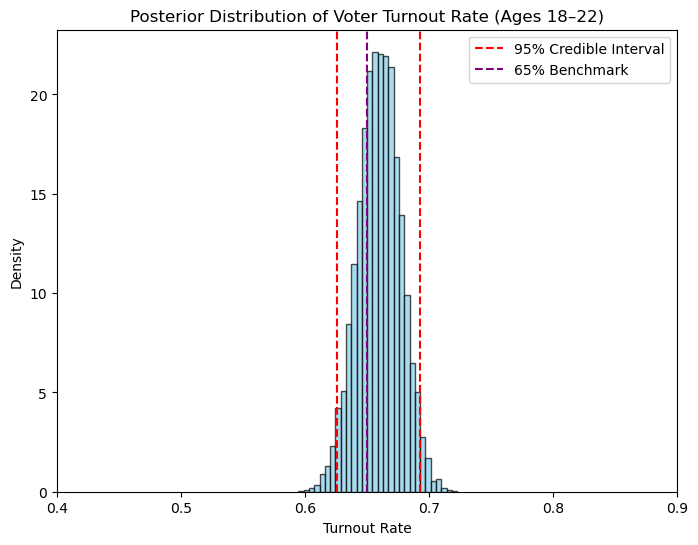

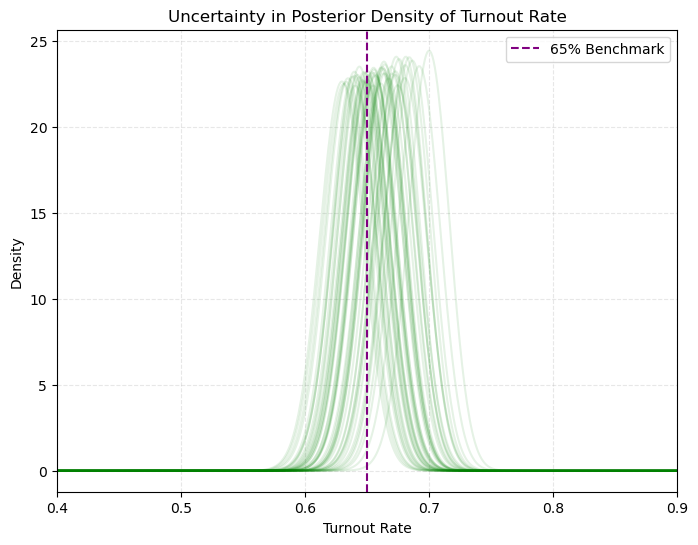


🗳️ Voter Turnout Estimate (Bayesian Inference)
• Mean turnout rate: 0.6596
• Mode turnout rate: 0.6600
• 95% credible interval: (0.626, 0.693)
• Probability turnout > 65%: 0.7157

📌 CONCLUSION:
The estimated turnout rate for first-time voters aged 18–22 is approximately 66.0%, with a 95% credible interval ranging from 62.6% to 69.3%. There is a 71.6% chance that the true turnout rate exceeded 65%, suggesting that civic engagement among young voters may be meaningfully strong.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Set seed for reproducibility
np.random.seed(42)

# Observed data
total_voters = 750
actual_voted = 495

# Prior: Beta(1, 1) (uniform prior)
prior_alpha = 1
prior_beta = 1

# Posterior parameters
posterior_alpha = prior_alpha + actual_voted
posterior_beta = prior_beta + (total_voters - actual_voted)

# Draw samples from the posterior distribution
posterior_samples = np.random.beta(posterior_alpha, posterior_beta, size=10000)

# Calculate 95% credible interval
credible_interval = np.percentile(posterior_samples, [2.5, 97.5])

# First Graph: Posterior Distribution
plt.figure(figsize=(8, 6))
plt.hist(posterior_samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(credible_interval[0], color='red', linestyle='--', label='95% Credible Interval')
plt.axvline(credible_interval[1], color='red', linestyle='--')
plt.axvline(0.65, color='purple', linestyle='--', label='65% Benchmark')
plt.title('Posterior Distribution of Voter Turnout Rate (Ages 18–22)')
plt.xlabel('Turnout Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.4, 0.9)
plt.show()

# Second Graph: Posterior Density Overlay to Visualize Uncertainty
plt.figure(figsize=(8, 6))
x = np.linspace(0, 1, 1000)
for _ in range(50):
    alpha_sample = np.random.gamma(shape=posterior_alpha, scale=1.0)
    beta_sample = np.random.gamma(shape=posterior_beta, scale=1.0)
    y = beta.pdf(x, alpha_sample, beta_sample)
    plt.plot(x, y, color='green', alpha=0.1)

plt.axvline(0.65, color='purple', linestyle='--', label='65% Benchmark')
plt.title('Uncertainty in Posterior Density of Turnout Rate')
plt.xlabel('Turnout Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.4, 0.9)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Summary statistics
mean_turnout = posterior_alpha / (posterior_alpha + posterior_beta)
mode_turnout = (posterior_alpha - 1) / (posterior_alpha + posterior_beta - 2)
prob_above_65 = np.mean(posterior_samples > 0.65)

# Print results
print("\n\033[1m🗳️ Voter Turnout Estimate (Bayesian Inference)\033[0m")
print(f"• Mean turnout rate: \033[94m{mean_turnout:.4f}\033[0m")
print(f"• Mode turnout rate: \033[94m{mode_turnout:.4f}\033[0m")
print(f"• 95% credible interval: \033[94m({credible_interval[0]:.3f}, {credible_interval[1]:.3f})\033[0m")
print(f"• Probability turnout > 65%: \033[92m{prob_above_65:.4f}\033[0m")

print("\n\033[1m📌 CONCLUSION:\033[0m")
print("\033[1mThe estimated turnout rate for first-time voters aged 18–22 is approximately {:.1f}%, "
      "with a 95% credible interval ranging from {:.1f}% to {:.1f}%. "
      "There is a {:.1f}% chance that the true turnout rate exceeded 65%, suggesting that civic engagement "
      "among young voters may be meaningfully strong.\033[0m"
      .format(mean_turnout * 100, credible_interval[0] * 100, credible_interval[1] * 100, prob_above_65 * 100))